In [1]:
import os
from neurosynth.base.dataset import download
import nimare


In [10]:
# download neurosynth
out_dir = os.path.abspath("./example_data")
if not os.path.isdir(out_dir):
    os.mkdir(out_dir)

if not os.path.isfile(os.path.join(out_dir, "database.txt")):
    download(out_dir, unpack=True)

In [5]:
# convert neurosynth database to NiMARE dataset file
dset = nimare.io.convert_neurosynth_to_dataset(
    os.path.join(out_dir, "database.txt"), os.path.join(out_dir, "features.txt")
)

dset.save(os.path.join(out_dir, "neurosynth_dataset.pkl.gz"))

### Load and work with datasets

In [6]:
import pandas as pd
from nimare.tests.utils import get_test_data_path

In [10]:
# Let's start by downloading a dataset
dset_dir = nimare.extract.download_nidm_pain(data_dir = os.path.abspath("./example_data"))

# Now we can load and save the Dataset object
dset_file = os.path.join(get_test_data_path(), "nidm_pain_dset.json")

dset = nimare.dataset.Dataset(dset_file, target="mni152_2mm", mask=None)

dset.save("pain_dset.pkl")

os.remove("pain_dset.pkl")  # cleanup


In [14]:
dset.annotations.head()

,id,study_id,contrast_id
0,pain_01.nidm-1,pain_01.nidm,1
1,pain_02.nidm-1,pain_02.nidm,1
2,pain_03.nidm-1,pain_03.nidm,1
3,pain_04.nidm-1,pain_04.nidm,1
4,pain_05.nidm-1,pain_05.nidm,1


In [16]:
# reported peaks
dset.coordinates.head()

,id,study_id,contrast_id,x,y,z,space,i,j,k
0,pain_01.nidm-1,pain_01.nidm,1,48.0,-38.0,-24.0,mni152_2mm,21,44,24
1,pain_01.nidm-1,pain_01.nidm,1,54.0,-46.0,-26.0,mni152_2mm,18,40,23
2,pain_01.nidm-1,pain_01.nidm,1,60.0,-30.0,-28.0,mni152_2mm,15,48,22
3,pain_01.nidm-1,pain_01.nidm,1,60.0,-58.0,-10.0,mni152_2mm,15,34,31
4,pain_01.nidm-1,pain_01.nidm,1,38.0,46.0,6.0,mni152_2mm,26,86,39


In [18]:
# Here we'll only show a subset of these image types to fit in the window.
columns_to_show = ["id", "study_id", "contrast_id", "beta__relative", "z__relative"]
dset.images[columns_to_show].head()

,id,study_id,contrast_id,beta__relative,z__relative
0,pain_01.nidm-1,pain_01.nidm,1,pain_01.nidm/Contrast.nii.gz,None
1,pain_02.nidm-1,pain_02.nidm,1,pain_02.nidm/Contrast.nii.gz,None
2,pain_03.nidm-1,pain_03.nidm,1,pain_03.nidm/Contrast.nii.gz,None
3,pain_04.nidm-1,pain_04.nidm,1,pain_04.nidm/Contrast.nii.gz,None
4,pain_05.nidm-1,pain_05.nidm,1,pain_05.nidm/Contrast.nii.gz,None


In [19]:
dset.metadata.head()

,id,study_id,contrast_id,sample_sizes
0,pain_01.nidm-1,pain_01.nidm,1,[25]
1,pain_02.nidm-1,pain_02.nidm,1,[25]
2,pain_03.nidm-1,pain_03.nidm,1,[20]
3,pain_04.nidm-1,pain_04.nidm,1,[20]
4,pain_05.nidm-1,pain_05.nidm,1,[9]


In [20]:
dset.ids

array(['pain_01.nidm-1', 'pain_02.nidm-1', 'pain_03.nidm-1',
       'pain_04.nidm-1', 'pain_05.nidm-1', 'pain_06.nidm-1',
       'pain_07.nidm-1', 'pain_08.nidm-1', 'pain_09.nidm-1',
       'pain_10.nidm-1', 'pain_11.nidm-1', 'pain_12.nidm-1',
       'pain_13.nidm-1', 'pain_14.nidm-1', 'pain_15.nidm-1',
       'pain_16.nidm-1', 'pain_17.nidm-1', 'pain_18.nidm-1',
       'pain_19.nidm-1', 'pain_20.nidm-1', 'pain_21.nidm-1'], dtype=object)

In [23]:
sel_studies = dset.get_studies_by_coordinate(xyz=[[0, 0, 0]], r=20)
print("\n".join(sel_studies))

pain_03.nidm-1
pain_10.nidm-1
pain_11.nidm-1


### Generate modeled activation maps with peaks2maps

In [2]:
import os
from nilearn.plotting import plot_glass_brain
import nimare
from nimare.tests.utils import get_test_data_path


In [3]:
# Let's start by downloading a dataset
dset_dir = nimare.extract.download_nidm_pain(data_dir = os.path.abspath("./example_data"))
dset_file = os.path.join(get_test_data_path(), "nidm_pain_dset.json")
dset = nimare.dataset.Dataset(dset_file)

In [4]:

k = nimare.meta.kernel.Peaks2MapsKernel(model_dir='./example_data')

imgs = k.transform(dset, return_type="image")



/data/u_bayrak_software/anaconda2/envs/surfstat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/u_bayrak_software/anaconda2/envs/surfstat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/u_bayrak_software/anaconda2/envs/surfstat/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/u


Dataset created in ./example_data/peaks2maps_model_ohbm2018__temp



In [5]:
len(imgs)

21

In [6]:
imgs

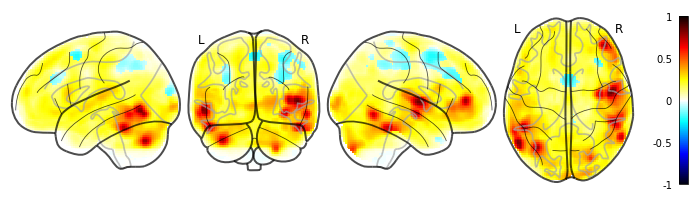

In [7]:
display = plot_glass_brain(imgs[0], display_mode="lyrz", plot_abs=False, 
                           colorbar=True, vmax=1, threshold=0 )

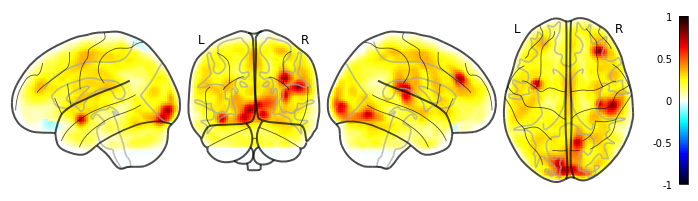

In [8]:
display = plot_glass_brain(imgs[1], display_mode="lyrz", plot_abs=False, 
                           colorbar=True, vmax=1, threshold=0 )

### Run a meta-analytic coactivation modeling analysis

In [9]:
import nibabel as nib
import numpy as np
from nilearn import datasets, image, plotting
import nimare

In [10]:
dset_file = './example_data/neurosynth_dataset.pkl.gz'
dset = nimare.dataset.Dataset.load(dset_file)


In [11]:
dset

In [12]:
# We'll use the right amygdala from the Harvard-Oxfod atlas

atlas = datasets.fetch_atlas_harvard_oxford("sub-maxprob-thr50-2mm",
                                            data_dir = './example_data/')

img = nib.load(atlas["maps"])

roi_idx = atlas["labels"].index("Right Amygdala")
img_vals = np.unique(img.get_fdata())
roi_val = img_vals[roi_idx]
roi_img = image.math_img("img1 == {}".format(roi_val), img1=img)


In [13]:
roi_idx

20

In [14]:
img_vals

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21.])

In [15]:
roi_val

20.0

In [16]:
roi_img

In [17]:
# select studies with a reported coordinate in the ROI

roi_ids = dset.get_studies_by_mask(roi_img)

dset_sel = dset.slice(roi_ids)
print(
    "{}/{} studies report at least one coordinate in the "
    "ROI".format(len(roi_ids), len(dset.ids))
)



1199/14371 studies report at least one coordinate in the ROI


In [18]:
# select studies with NO reported coordinates in the ROI

no_roi_ids = list(set(dset.ids).difference(roi_ids))

dset_unsel = dset.slice(no_roi_ids)

print("{}/{} studies report zero coordinates in the " "ROI".format(len(no_roi_ids), len(dset.ids)))


13172/14371 studies report zero coordinates in the ROI


In [19]:
# MKDA Chi2 with FWE correction

mkda = nimare.meta.MKDAChi2(kernel__r=10)
mkda.fit(dset_sel, dset_unsel)



In [20]:
corr = nimare.correct.FWECorrector(method="montecarlo", n_iters=10)
cres = corr.transform(mkda.results)


INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.mkda.MKDAChi2.correct_fwe_montecarlo.


In [21]:
cres

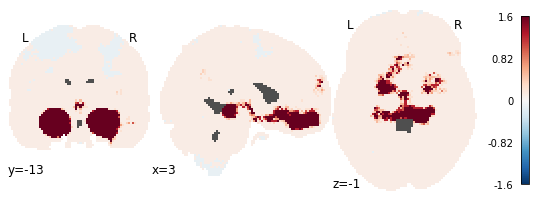

In [31]:
# We want the "specificity" map (2-way chi-square between sel and unsel)
plotting.plot_stat_map(
    cres.get_map('z_desc-specificity_level-voxel_corr-FWE_method-montecarlo'),
    threshold=0,
    draw_cross=False,
    cmap="RdBu_r",
)

### Generate modeled activation maps

In [36]:
import os
import matplotlib.pyplot as plt
import numpy as np
from nilearn.plotting import plot_stat_map
import nimare
from nimare.tests.utils import get_test_data_path

In [38]:
# Let's start by downloading a dataset
dset_dir = nimare.extract.download_nidm_pain(data_dir = os.path.abspath("./example_data"))
dset_file = os.path.join(get_test_data_path(), "nidm_pain_dset.json")
dset = nimare.dataset.Dataset(dset_file)

In [43]:
kernel = nimare.meta.kernel.MKDAKernel(r=2)
mkda_r02 = kernel.transform(dset, return_type="image")
kernel = nimare.meta.kernel.MKDAKernel(r=6)
mkda_r06 = kernel.transform(dset, return_type="image")
kernel = nimare.meta.kernel.MKDAKernel(r=10)
mkda_r10 = kernel.transform(dset, return_type="image")
kernel = nimare.meta.kernel.MKDAKernel(r=14)
mkda_r14 = kernel.transform(dset, return_type="image")

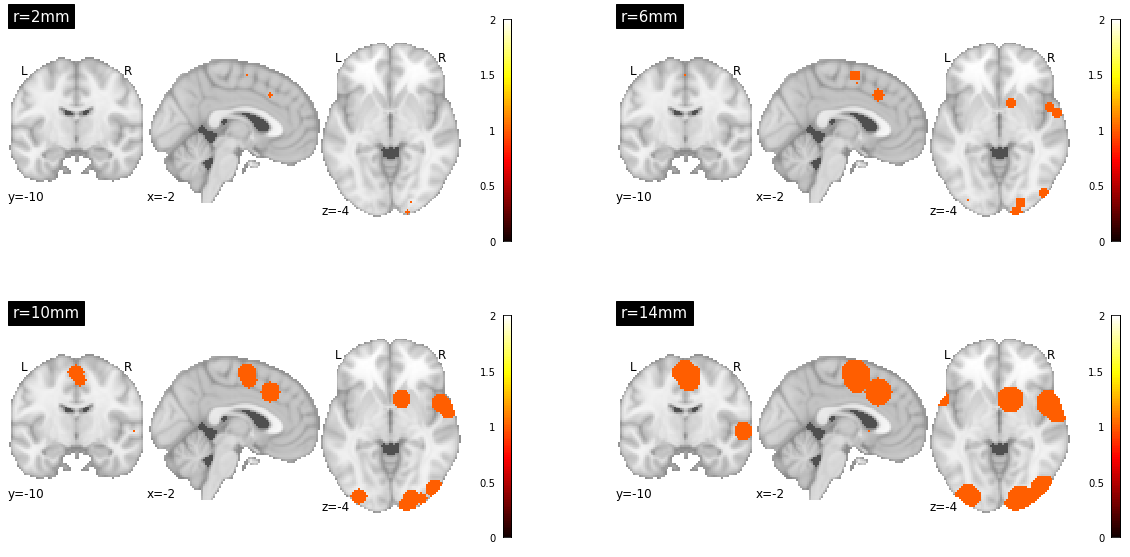

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

plot_stat_map(
    mkda_r02[2], cut_coords=[-2, -10, -4], title="r=2mm", vmax=2, 
    axes=axes[0, 0], draw_cross=False)

plot_stat_map(
    mkda_r06[2], cut_coords=[-2, -10, -4], title="r=6mm", vmax=2, 
    axes=axes[0, 1], draw_cross=False)

plot_stat_map(
    mkda_r10[2], cut_coords=[-2, -10, -4], title="r=10mm", vmax=2,
    axes=axes[1, 0], draw_cross=False, )

plot_stat_map(
    mkda_r14[2], cut_coords=[-2, -10, -4], title="r=14mm", vmax=2,
    axes=axes[1, 1], draw_cross=False, )


### Decode regions of interest and subsets of Datasets

In [46]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from nilearn.plotting import plot_roi, plot_stat_map
import nimare
from nimare.decode import discrete
from nimare.tests.utils import get_test_data_path


In [47]:
dset = nimare.dataset.Dataset.load(
    os.path.join(get_test_data_path(), "neurosynth_laird_studies.pkl.gz"))


In [50]:
dset.annotations.head()

,id,study_id,contrast_id,Neurosynth_TFIDF__001,Neurosynth_TFIDF__01,Neurosynth_TFIDF__05,Neurosynth_TFIDF__10,Neurosynth_TFIDF__10 healthy,Neurosynth_TFIDF__100,Neurosynth_TFIDF__11,...,Neurosynth_TFIDF__year old,Neurosynth_TFIDF__years,Neurosynth_TFIDF__yield,Neurosynth_TFIDF__yielded,Neurosynth_TFIDF__young,Neurosynth_TFIDF__young adults,Neurosynth_TFIDF__young healthy,Neurosynth_TFIDF__younger,Neurosynth_TFIDF__younger adults,Neurosynth_TFIDF__zone
2225,17029760-1,17029760,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3565,18760263-1,18760263,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3908,19162389-1,19162389,1,0.0,0.0,0.0,0.0,0.0,0.0,0.179402,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,19603407-1,19603407,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5031,20197097-1,20197097,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


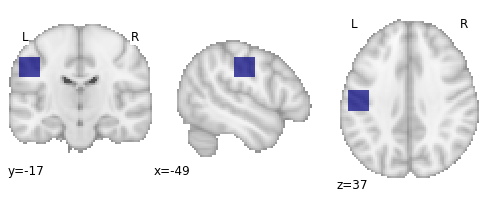

In [51]:
# create regions of interest

# First we'll make an ROI
arr = np.zeros(dset.masker.mask_img.shape, int)
arr[65:75, 50:60, 50:60] = 1
mask_img = nib.Nifti1Image(arr, dset.masker.mask_img.affine)
plot_roi(mask_img, draw_cross=False)

# Get studies with voxels in the mask
ids = dset.get_studies_by_mask(mask_img)



In [52]:
# Run the decoder
decoder = discrete.NeurosynthDecoder(correction=None)
decoder.fit(dset)
decoded_df = decoder.transform(ids=ids)
decoded_df.sort_values(by="probReverse", ascending=False).head()

,pForward,zForward,probForward,pReverse,zReverse,probReverse
Term,,,,,,
Neurosynth_TFIDF__motor,2.779546e-08,5.554784,0.375000,0.003054,2.962263,1.000000
Neurosynth_TFIDF__presence,2.553341e-04,3.656850,0.545455,0.005002,2.806918,0.916667
Neurosynth_TFIDF__behavioral,3.583888e-04,3.568969,0.383333,0.041038,2.043146,0.869565
Neurosynth_TFIDF__primary,3.583888e-04,3.568969,0.383333,0.041038,2.043146,0.869565
Neurosynth_TFIDF__finally,9.176489e-02,1.686161,0.583333,0.057395,1.900292,0.857143


In [53]:
# Run the decoder
decoder = discrete.BrainMapDecoder(correction=None)
decoder.fit(dset)
decoded_df = decoder.transform(ids=ids)
decoded_df.sort_values(by="probReverse", ascending=False).head()


,pForward,zForward,likelihoodForward,pReverse,zReverse,probReverse
Term,,,,,,
Neurosynth_TFIDF__critical,1.0,0.0,40.958333,1.0,0.0,0.025862
Neurosynth_TFIDF__communication,1.0,0.0,40.958333,1.0,0.0,0.025862
Neurosynth_TFIDF__correction,1.0,0.0,40.958333,1.0,0.0,0.025862
Neurosynth_TFIDF__pitch,1.0,0.0,40.958333,1.0,0.0,0.025862
Neurosynth_TFIDF__tasks,1.0,0.0,40.958333,1.0,0.0,0.025862
